# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [111]:
library(mclust)
library(cluster)
#library(rgl)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

In [113]:
clus <-Mclust(datos,G=4)
#clus <-Mclust(datos)
summary(clus)
clus

cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl
#print(clus$BIC)
#print(clus$bic)
#print(clus$modelName)
#plot(clus, what = "classification")


---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VEV (ellipsoidal, equal shape) model with 4 components: 

 log.likelihood  n df       BIC       ICL
      -129.0138 25 71 -486.5678 -486.5782

Clustering table:
1 2 3 4 
5 8 7 5 

'Mclust' model object: (VEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "bic"           
 [9] "loglik"         "df"             "hypvol"         "parameters"    
[13] "z"              "classification" "uncertainty"   

WATER,PROTEIN,FAT,LACTOSE,ASH
89.45999,1.980001,2.080005,6.200009,0.3279979
71.88271,7.298580,15.881214,3.088610,0.7512686
84.71493,4.756873,4.756149,5.100211,0.8185953
67.86000,10.740002,17.380003,2.379999,1.6400005


HORSE  ORANGUTAN     MONKEY     DONKEY      HIPPO      CAMEL      BISON 
         1          1          1          1          2          3          3 
   BUFFALO GUINEA_PIG        CAT        FOX      LLAMA       MULE        PIG 
         3          2          2          3          3          1          2 
     ZEBRA      SHEEP        DOG   ELEPHANT     RABBIT        RAT       DEER 
         3          3          2          2          4          4          4 
  REINDEER      WHALE       SEAL    DOLPHIN 
         4          4          2          2

Ejercicio 1: 
<br><b>a)</b> Explique como funciona el método Mclust, describa parámetros de entrada y salida.<br>
<b>R: </b> GMM que utiliza el algoritmo EM, que a su vez utiliza algun criterio Bayesiano para clustering basado en modelos, clasificación, y estimación de densidad. También se puede hacer reducción de dimensiones e inferencias basadas en remuestreo.
En este caso  recibe como entrada los datos del archivo (entidad-caracteristicas) y el número de clusters, que podría omitirse y en ese caso buscaría un G optimo, aunque existen más valores de entrada que nos permiten customizar el resultado, estos son los básicos. Como salida se tiene un objeto 'Mclust' que entre algunos de sus atributos contiene el número de clusters, el tipo de criterio bayesiano de agrupamiento, las medias y varianzas de los grupos, entre varios otros.
<br><b>b)</b> Interprete y comente los resultados obtenidos.<br>
<b>R: </b>En este caso obligamos a que tenga 4 grupos, sino 'Mclust' habria propuesto 3 opciones (EEV,9), (VEV,6), (VEV,5), siendo la primera la mejor. También se obtuvo la clasificación de las entidades entre los distintos grupos y la media de cada grupo.

Call:
princomp(x = datos, cor = TRUE)

Standard deviations:
    Comp.1     Comp.2     Comp.3     Comp.4     Comp.5 
1.96946572 0.94201777 0.35905327 0.31397620 0.07941651 

 5  variables and  25 observations.

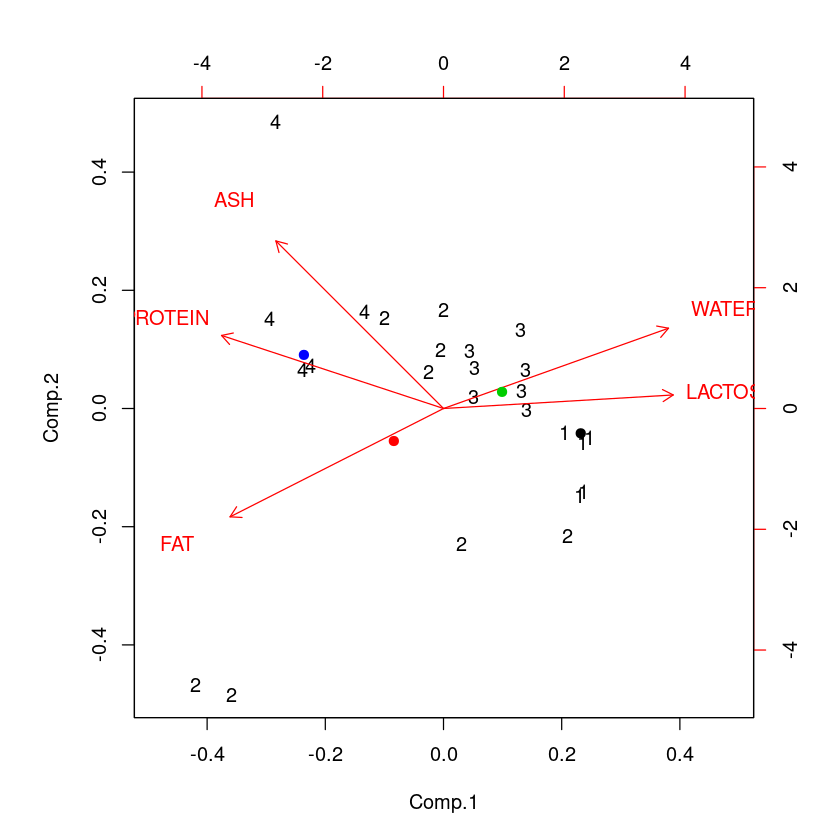

In [114]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)
res

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


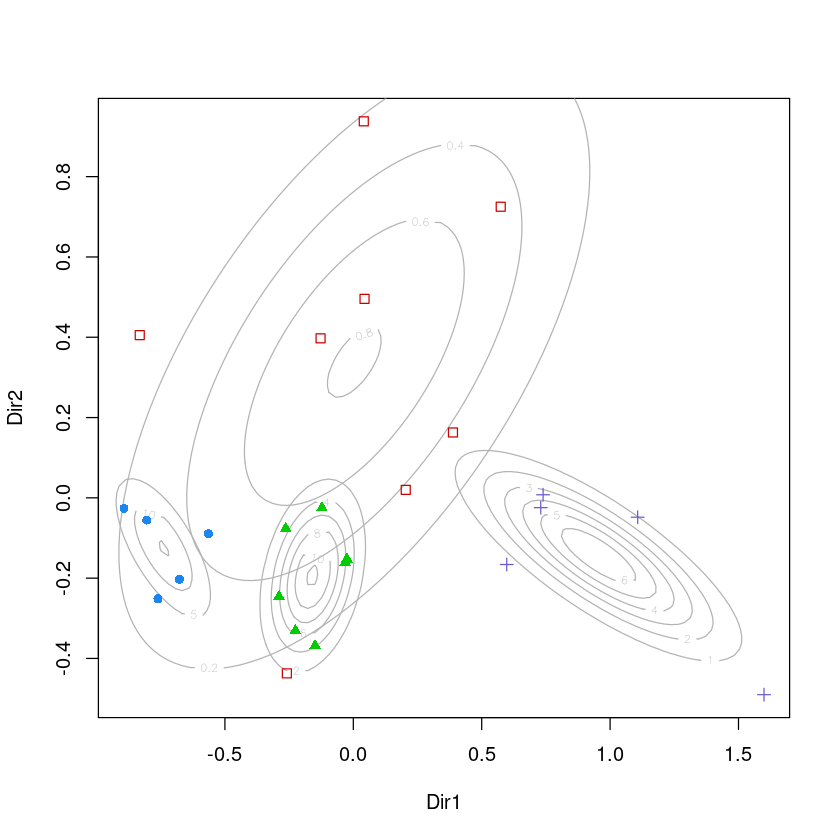

In [115]:
mod5 <- Mclust(datos,G=4)
drmod <- MclustDR(mod5, lambda = 1)
plot(drmod, what = "contour")

Ejercicio 2: Repita el procedimiento considerando 2, 3 y 4 grupos. Discuta y compare  sus resultados con aquellos obtenidos con k-means<br>
<b>R: </b><br>
- <b>G=2, </b>Los resultados de clasificación fueron similares, con un individuo de diferencia, y la posición de los centros/medias tuvieron pequeñas modificaciones.
- <b>G=3, </b>La variación de los centros/medias es altisima por lo que la clasificación también sufre grandes cambios. 
- <b>G=4, </b>Ocurre lo mismo que en el anterior.


En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico

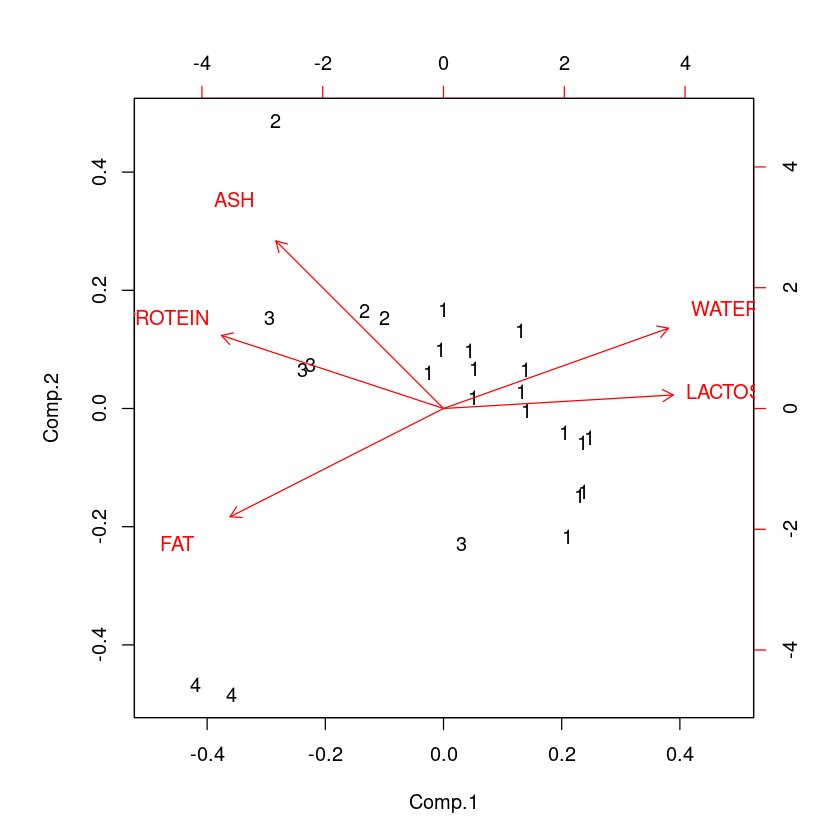

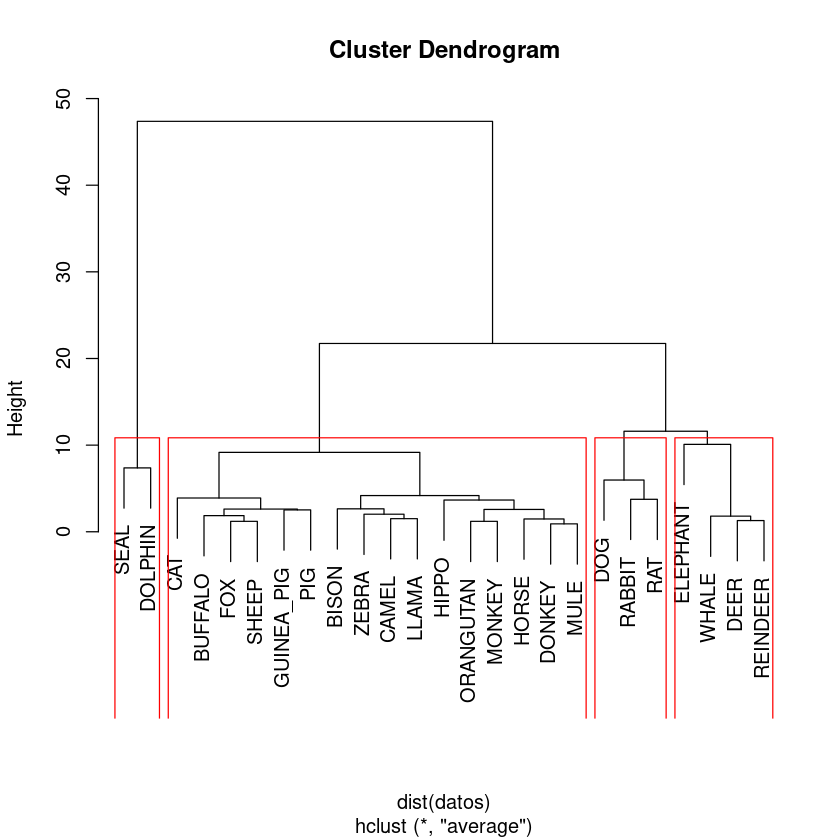

In [117]:
k<-4
metodo<-"average"
res3 <- hclust(dist(datos),metodo)
#res3$method
biplot(res, xlabs= cutree(res3,k))
plot(res3)
rect.hclust(res3, k=k, border="red")

Ejercicio 3: <br>
a) Explique como funciona el método hclust, describa parámetros de entrada y salida.<br>
<b>R: </b>Es un método de clusterización aglomerativo (bottom-up), por lo que parte con cada objeto siendo un cluster, y después según algun criterio los va aglomerando, hasta llegar a tener un cluster que reune a todos los objetos. El mínimo de entradas que puede recibir es la matriz de disimilaridad de los datos (si este es el caso el critero es complete linkage), aunque también se puede especificar el método y otros parametros. Como resultado se obtiene arbol de clusters.<br>
b) Interprete y comente los resultados obtenidos.<br>
<b>R: </b>Utilizando el método de aglomeramiento por defecto (complte linkage) y con un k 4 se obtienen 4 grupos, en el cuarto se encuentra sea {seal, dolphin} que al parecer tienen una leche con mayor cantidad de grasa, en el tercero esta la {whale, elephant, deer, reindeer} que tienen una leche con mayor proteinas, en el grupo dos estan {rat, rabbit, dog} que tienen una leche alta en minerales, y finalmente el grupo uno {el resto} tiene una leche con mayor agua y lactosa.<br>
c) Utilice otros parámetros en hclust y discuta como varían los resultados.<br>
<b>R: </b>Utilizando el método "complete" y "average" no provoca gran cambio, sin embargo utilizar "single" genera clusters completmente distintos. Es interesante lo alejados que estan {seal, dolphin} que utilizando culquier método siempre son agrupados en un mismo cluster sin más miembros.

Ejercicio 4: <br>
a) Realice un análisis de clustering con Kmeans, GMM y Análisis Jerárquico para el conjunto de datos iris.csv
Interprete sus resultados.<br>
b) Calcule alguna de las medidas de calidad estudiadas (purity, rand index o mutual information) 
para cada uno de los análisis realizado en (a). Discuta sus resultados.

In [129]:
datos1 <-read.csv("Iris.csv", header = TRUE, sep = ",")
#Separacion de datos y clase + normalizacion de los datos
class<-datos1[6]
datos1<-datos1[2:5]

datos1$SepalLengthCm <-normalize(datos1$SepalLengthCm)
datos1$SepalWidthCm <- normalize(datos1$SepalWidthCm)
datos1$PetalLengthCm <- normalize(datos1$PetalLengthCm)
datos1$PetalWidthCm <- normalize(datos1$PetalWidthCm)

head(datos1)
head(class)

clPurity <- function(clusters, classes) {
  sum(apply(table(classes, clusters), 2, max)) / length(clusters)
}

SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0.22222222,0.6250000,0.06779661,0.04166667
0.16666667,0.4166667,0.06779661,0.04166667
0.11111111,0.5000000,0.05084746,0.04166667
0.08333333,0.4583333,0.08474576,0.04166667
0.19444444,0.6666667,0.06779661,0.04166667
0.30555556,0.7916667,0.11864407,0.12500000


Species
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa


In [130]:
summary(datos1)

 SepalLengthCm     SepalWidthCm    PetalLengthCm     PetalWidthCm    
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.2222   1st Qu.:0.3333   1st Qu.:0.1017   1st Qu.:0.08333  
 Median :0.4167   Median :0.4167   Median :0.5678   Median :0.50000  
 Mean   :0.4287   Mean   :0.4392   Mean   :0.4676   Mean   :0.45778  
 3rd Qu.:0.5833   3rd Qu.:0.5417   3rd Qu.:0.6949   3rd Qu.:0.70833  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  

   
    Iris-setosa Iris-versicolor Iris-virginica
  1          50               0              0
  2           0              47             14
  3           0               3             36

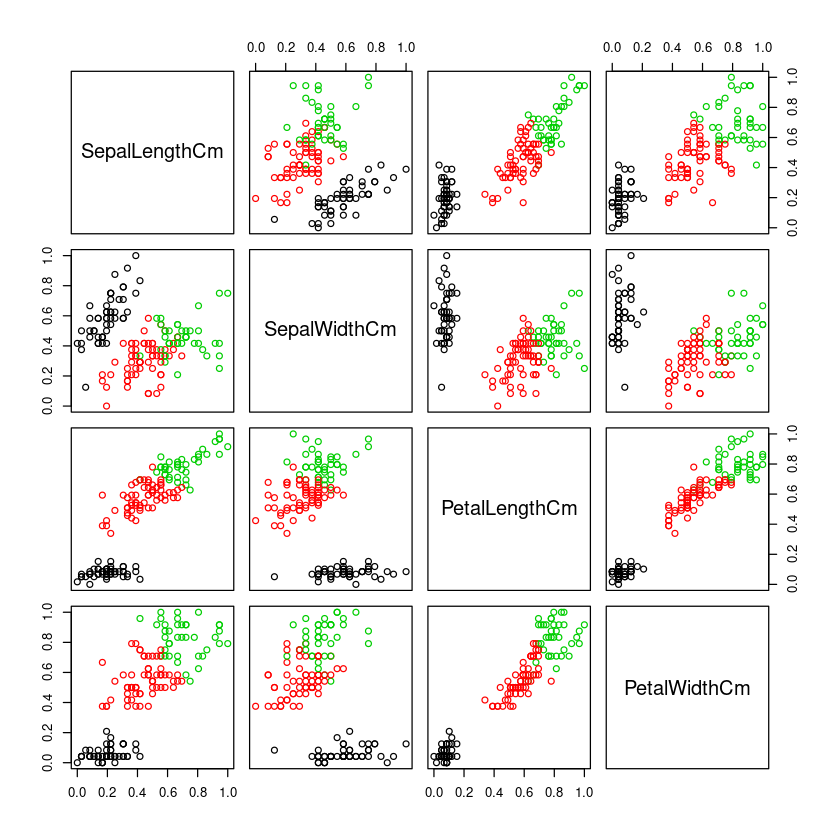

In [150]:
cl<-kmeans(datos1,3)
pairs(datos1,col=cl$cluster)
table(cl$cluster,class$Species)

   
    Iris-setosa Iris-versicolor Iris-virginica
  1          50               0              0
  2           0              50             17
  3           0               0             33

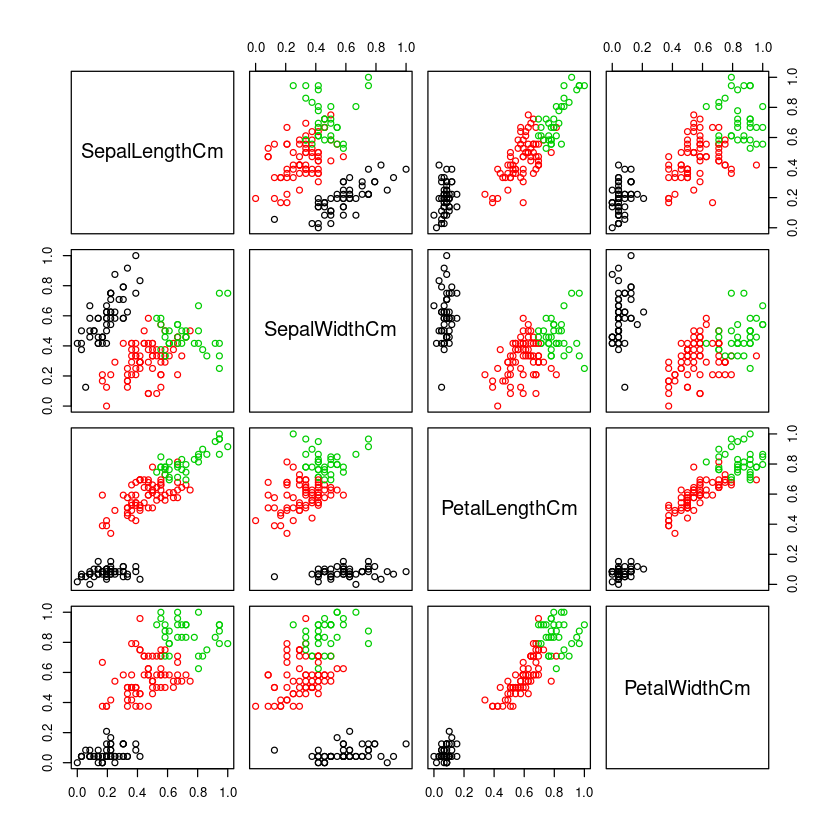

In [151]:
cl2<-hclust(dist(datos1),"average")
pairs(datos1,col=cutree(cl2,3))
table(cutree(cl2,3),class$Species)

   
    Iris-setosa Iris-versicolor Iris-virginica
  1          50               0              0
  2           0              45              0
  3           0               5             50

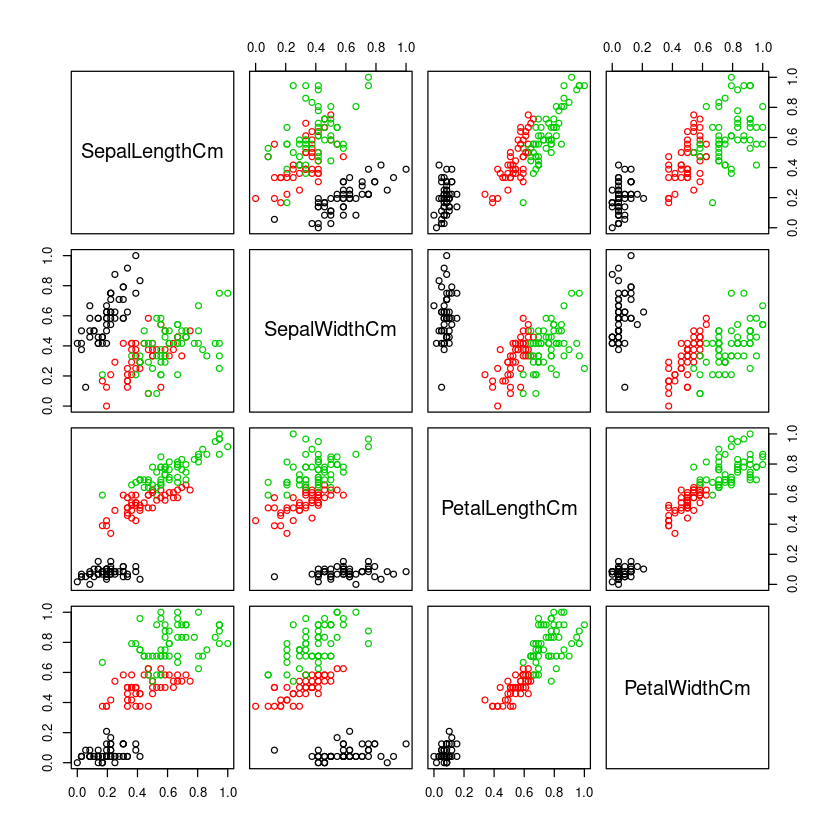

In [152]:
cl3 <-Mclust(datos1,G=3)
pairs(datos1,col=cl3$classification)
table(cl3$classification,class$Species)

In [159]:
kmpurity<-clPurity(cl$cluster, class$Species)
hclustpurity<-clPurity(cutree(cl2,3), class$Species)
mclustpurity<-clPurity(cl3$classification, class$Species)
cat("Purity de K-means (Iris): ",kmpurity,"\n")
cat("Purity de Hclust (Iris): ",hclustpurity,"\n")
cat("Purity de Mclust (Iris): ",mclustpurity)

Purity de K-means (Iris):  0.8866667 
Purity de Hclust (Iris):  0.8866667 
Purity de Mclust (Iris):  0.9666667